# Telematics Risk Scoring Analysis� *Author: Shaik Mohammad Naseer Hussain*  📅 *Date: June 2025* 
💡 *Goal: Clean and analyze telematics sensor data to extract behavior insights and detect risk anomalies.*


##  Dataset Overview

This notebook uses simulated telematics data collected from 10 vehicles on October 8, 2016, in the UAE.

### Key Features:
- **Speed** (km/h)
- **Engine Status**
- **GPS Coordinates** (Latitude, Longitude)
- **Fuel Level**
- **Idle and Braking Flags**
- **Timestamps (TimeUtc)**

These metrics help us understand vehicle behavior and build scoring models.


##  Step 1: Import Required Libraries

We begin by importing essential Python packages for data manipulation, visualization, and mapping.


In [3]:
# Hi, I'm Naseer and this is the first step of my Telematics Risk Dashboard project.
# In this part, I will import all the necessary libraries.

import pandas as pd          # for data handling
import numpy as np           # for numerical calculations
import matplotlib.pyplot as plt  # for charts
import seaborn as sns        # for visualizations
!pip install geopy
from geopy.distance import geodesic  # to calculate distance between GPS coordinates

# Optional setting to display all columns of data when printing
pd.set_option('display.max_columns', None)


   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   ------------ -------------------------- 41.0/125.4 kB 150.6 kB/s eta 0:00:01
   ------------------------------- ------ 102.4/125.4 kB 368.6 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 408.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ------------------------------ --------- 30.7/40.3 kB 1.3 MB/s eta 0:00:01
   -------------------------------------

##  Step 2: Load Telematics Data

We load the Excel file (`data.xlsx`) using `pandas`. The main sheet used is **DeviceStatus**.


In [6]:
# Now I will load the Excel file that contains telematics data.
# The file is named 'data.xlsx' and I’m using the sheet named 'DeviceStatus'.

df = pd.read_excel(r"C:\Users\nasee\Desktop\Telematics-Risk-Scoring\data\data.xlsx", sheet_name="DeviceStatus")


# Let me check the size of the dataset
print("✅ Data loaded successfully. Shape of dataset:", df.shape)


✅ Data loaded successfully. Shape of dataset: (64094, 21)


## Step 3: First Look at the Data

We inspect the shape of the dataset, display the first few rows, and review data types and null values.


In [7]:
# I want to see the first 5 rows of the dataset to understand what columns I have.

df.head()


,DeviceNumber,TimeUtc,Version,Mileage,Longitude,Latitude,Speed,EngineRPM,LockTrunk,LockHood,LockDriver,LockTPassenger,LockLeftRear,LockRightRear,LastSync,LastNumber,EngineOn,Temperature,FuelLevel,AlarmOn,SatellitesCount
0,device_1,2016-10-08 00:00:00,87,639000,53.726430,23.126805,0,0,0,0,0,0,0,00:00:00,2016-10-08 00:00:00,13,0,38,0,0,9
1,device_2,2016-10-08 00:00:06,87,55341000,56.188661,25.518500,0,0,0,0,0,0,0,00:00:00,2016-10-08 00:00:06,22,0,42,0,0,9
2,device_1,2016-10-08 00:00:09,87,639000,53.726430,23.126805,0,0,0,0,0,0,0,00:00:00,2016-10-08 00:00:09,13,0,38,0,0,9
3,device_3,2016-10-08 00:00:18,87,227000,55.244163,25.205136,0,0,0,0,0,0,0,00:00:00,2016-10-08 00:00:18,21,0,43,0,0,4
4,device_4,2016-10-08 00:00:22,87,354000,55.399996,25.278216,0,0,0,0,0,0,0,00:00:00,2016-10-08 00:00:22,14,0,45,0,0,9


In [8]:
# I will now check the data types of each column. This helps me know if any conversions are needed.

df.dtypes


DeviceNumber               object
TimeUtc            datetime64[ns]
Version                     int64
Mileage                     int64
Longitude                 float64
Latitude                  float64
Speed                       int64
EngineRPM                   int64
LockTrunk                   int64
LockHood                    int64
LockDriver                  int64
LockTPassenger              int64
LockLeftRear                int64
LockRightRear              object
LastSync           datetime64[ns]
LastNumber                  int64
EngineOn                    int64
Temperature                 int64
FuelLevel                   int64
AlarmOn                     int64
SatellitesCount             int64
dtype: object

In [9]:
# TimeUtc and LastSync should be in datetime format for time-based calculations.

df['TimeUtc'] = pd.to_datetime(df['TimeUtc'])
df['LastSync'] = pd.to_datetime(df['LastSync'])


## Step 4: Data Cleaning & Preprocessing

We'll clean constant-value columns, convert timestamps, and prepare the dataset for further analysis.


In [10]:
# I want to find out if there are any exact duplicate rows in the data.

duplicate_count = df.duplicated().sum()
print("Total duplicate rows in dataset:", duplicate_count)


Total duplicate rows in dataset: 144


In [11]:
# 🔍 Now I want to see if any columns have missing (null) values.
# This is important because missing data can cause problems later.

missing_values = df.isnull().sum()

print("🧹 Missing values in each column:")
print(missing_values)

# If you want to highlight only columns with missing values:
print("\n📌 Columns with missing values:")
print(missing_values[missing_values > 0])


🧹 Missing values in each column:
DeviceNumber       0
TimeUtc            0
Version            0
Mileage            0
Longitude          0
Latitude           0
Speed              0
EngineRPM          0
LockTrunk          0
LockHood           0
LockDriver         0
LockTPassenger     0
LockLeftRear       0
LockRightRear      0
LastSync           0
LastNumber         0
EngineOn           0
Temperature        0
FuelLevel          0
AlarmOn            0
SatellitesCount    0
dtype: int64

📌 Columns with missing values:
Series([], dtype: int64)


In [27]:
#  I want to see how many unique values are in each column.
# This helps me understand if a column is constant, binary, or has many variations.

print(" Unique values per column:")
print(df.nunique())


 Unique values per column:
DeviceNumber            10
TimeUtc              39670
Version                  2
Mileage                869
Longitude            28626
Latitude             28330
Speed                  191
EngineRPM              912
LockTrunk                2
LockHood                 2
LockDriver               2
LockTPassenger           2
LockLeftRear             2
LockRightRear            2
LastSync             39668
LastNumber              10
EngineOn                 2
Temperature             34
FuelLevel                1
AlarmOn                  1
SatellitesCount         11
DistanceKM           30811
IdleFlag                 2
SpeedDiff              171
HarshBraking             2
HarshAcceleration        2
dtype: int64


In [13]:
# This step gives me statistics like mean, min, max, standard deviation for all numeric columns.

print("Descriptive statistics for numerical columns:")
print(df.describe())


Descriptive statistics for numerical columns:
                             TimeUtc       Version       Mileage  \
count                          64094  64094.000000  6.409400e+04   
mean   2016-10-08 13:34:12.045620480     88.826286  7.515583e+06   
min              2016-10-08 00:00:00     87.000000  1.100000e+04   
25%    2016-10-08 09:35:52.249999872     87.000000  2.090000e+05   
50%              2016-10-08 14:39:07     87.000000  2.980000e+05   
75%    2016-10-08 17:24:08.750000128     94.000000  6.390000e+05   
max              2016-10-08 23:59:53     94.000000  5.568600e+07   
std                              NaN      3.073895  1.857002e+07   

          Longitude      Latitude         Speed     EngineRPM     LockTrunk  \
count  64094.000000  64094.000000  64094.000000  64094.000000  64094.000000   
mean      55.282033     24.914074     50.663697   1158.187241      0.003666   
min       53.682016     23.118998      0.000000      0.000000      0.000000   
25%       54.648119     2

In [14]:
# I want to explore some columns that look like categories or status flags.
# This will help me understand how frequent certain values are.

print("\n EngineOn value counts:")
print(df['EngineOn'].value_counts())

print("\n AlarmOn value counts:")
print(df['AlarmOn'].value_counts())

print("\n FuelLevel value counts:")
print(df['FuelLevel'].value_counts())



 EngineOn value counts:
EngineOn
1    45360
0    18734
Name: count, dtype: int64

 AlarmOn value counts:
AlarmOn
0    64094
Name: count, dtype: int64

 FuelLevel value counts:
FuelLevel
0    64094
Name: count, dtype: int64


Correlation matrix for numerical columns:
                  Version   Mileage  Longitude  Latitude     Speed  EngineRPM  \
Version          1.000000 -0.232505  -0.256219 -0.136474  0.036836  -0.035139   
Mileage         -0.232505  1.000000   0.249796  0.291596  0.158148   0.156271   
Longitude       -0.256219  0.249796   1.000000  0.833289 -0.245780  -0.181599   
Latitude        -0.136474  0.291596   0.833289  1.000000 -0.167538  -0.131734   
Speed            0.036836  0.158148  -0.245780 -0.167538  1.000000   0.828038   
EngineRPM       -0.035139  0.156271  -0.181599 -0.131734  0.828038   1.000000   
LockTrunk        0.002169 -0.023704  -0.003897 -0.015227 -0.058724  -0.068365   
LockHood         0.000704 -0.033867   0.059167  0.003892 -0.082755  -0.112784   
LockDriver      -0.000789 -0.024074   0.020130 -0.000755 -0.111602  -0.113305   
LockTPassenger   0.027086 -0.019238  -0.009238 -0.013551 -0.068998  -0.070984   
LockLeftRear     0.025474 -0.014736  -0.024060 -0.031878 -0.050929 

C:\Users\nasee\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


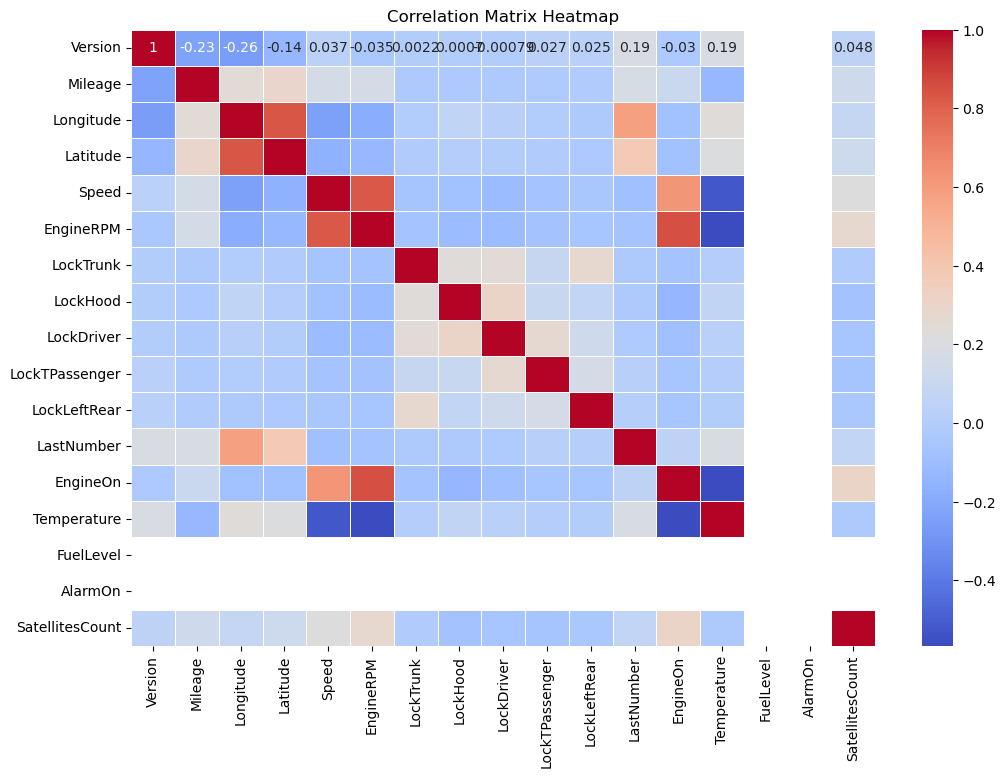

In [15]:
# Now I want to understand how different numeric columns relate to each other.
# A correlation matrix shows which variables move together (positive or negative).

print("Correlation matrix for numerical columns:")
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

# Optional: heatmap for visual display of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


C:\Users\nasee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


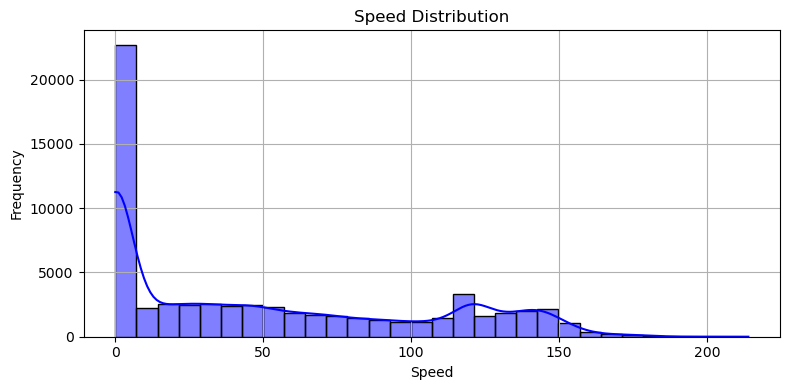

In [16]:
# 🏎I want to see how speed is distributed across the dataset.

plt.figure(figsize=(8, 4))
sns.histplot(df['Speed'], bins=30, kde=True, color='blue')
plt.title("Speed Distribution")
plt.xlabel("Speed")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


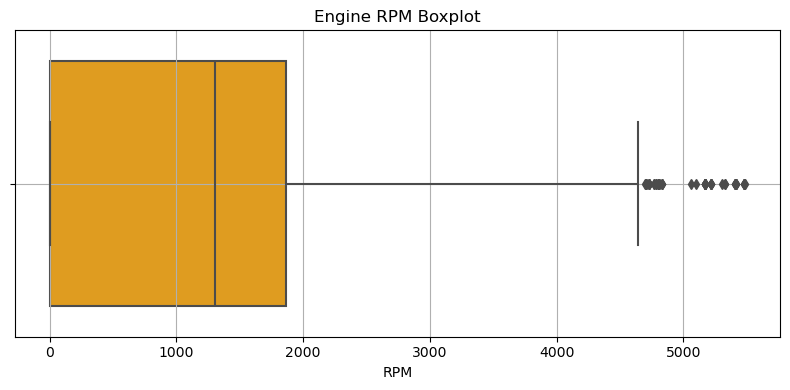

In [17]:
# This shows me the spread of Engine RPMs and helps identify outliers.

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['EngineRPM'], color='orange')
plt.title("Engine RPM Boxplot")
plt.xlabel("RPM")
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
# First, I want to make sure the data is sorted by each vehicle and its timestamp.
# This is important before calculating distance or speed changes.

df = df.sort_values(by=['DeviceNumber', 'TimeUtc']).reset_index(drop=True)


In [19]:
# I will now calculate how much distance each device travels between two points using geopy.

# First, create an empty column
df['DistanceKM'] = 0.0

# Loop through each row for each device
for device in df['DeviceNumber'].unique():
    temp = df[df['DeviceNumber'] == device]
    indices = temp.index

    for i in range(1, len(indices)):
        prev_idx = indices[i - 1]
        curr_idx = indices[i]

        # Get previous and current GPS coordinates
        prev_coords = (df.loc[prev_idx, 'Latitude'], df.loc[prev_idx, 'Longitude'])
        curr_coords = (df.loc[curr_idx, 'Latitude'], df.loc[curr_idx, 'Longitude'])

        # Calculate distance in kilometers
        dist = geodesic(prev_coords, curr_coords).kilometers
        df.at[curr_idx, 'DistanceKM'] = dist


In [20]:
# I want to know when the vehicle engine is ON but the vehicle is not moving (Speed = 0).

df['IdleFlag'] = ((df['EngineOn'] == 1) & (df['Speed'] == 0)).astype(int)

# This will give 1 if vehicle is idling, 0 otherwise
print("Total idle records:", df['IdleFlag'].sum())


Total idle records: 2612


In [21]:
# I'll now calculate changes in speed to detect sudden braking or acceleration.
# First, calculate speed difference for each device.

df['SpeedDiff'] = df.groupby('DeviceNumber')['Speed'].diff()

# Flag harsh braking (sudden negative speed drop > 20 km/h)
df['HarshBraking'] = ((df['SpeedDiff'] < -20)).astype(int)

# Flag harsh acceleration (sudden increase > 20 km/h)
df['HarshAcceleration'] = ((df['SpeedDiff'] > 20)).astype(int)

print("Total harsh braking events:", df['HarshBraking'].sum())
print("Total harsh acceleration events:", df['HarshAcceleration'].sum())


Total harsh braking events: 1352
Total harsh acceleration events: 989


In [22]:
# I want to summarize driving behavior for each driver (DeviceNumber)

risk_summary = df.groupby('DeviceNumber').agg({
    'DistanceKM': 'sum',
    'IdleFlag': 'sum',
    'HarshBraking': 'sum',
    'HarshAcceleration': 'sum'
}).reset_index()

# Rename columns for clarity
risk_summary.columns = ['DeviceNumber', 'TotalDistanceKM', 'TotalIdleEvents', 'TotalBrakes', 'TotalAccelerations']

# Preview the summary
risk_summary.head()


,DeviceNumber,TotalDistanceKM,TotalIdleEvents,TotalBrakes,TotalAccelerations
0,device_1,516.819568,353,186,144
1,device_10,204.965559,584,270,146
2,device_2,505.338284,251,233,156
3,device_3,47.219227,119,31,22
4,device_4,77.363866,168,109,100


In [24]:
# To avoid bias due to long trips, I’ll calculate ratios per 100 km

risk_summary['BrakesPer100KM'] = (risk_summary['TotalBrakes'] / risk_summary['TotalDistanceKM']) * 100
risk_summary['AccelerationsPer100KM'] = (risk_summary['TotalAccelerations'] / risk_summary['TotalDistanceKM']) * 100
risk_summary['IdlePer100KM'] = (risk_summary['TotalIdleEvents'] / risk_summary['TotalDistanceKM']) * 100

# Fill any NaN (due to 0 distance) with 0
risk_summary.fillna(0, inplace=True)


In [25]:
# I’ll combine all metrics into a final score using weighted formula (adjustable)

risk_summary['RiskScore'] = (
    0.4 * risk_summary['BrakesPer100KM'] +
    0.3 * risk_summary['AccelerationsPer100KM'] +
    0.3 * risk_summary['IdlePer100KM']
)

# Scale risk score to 0–100 range (optional)
max_score = risk_summary['RiskScore'].max()
risk_summary['RiskScore'] = (risk_summary['RiskScore'] / max_score) * 100

# Preview
risk_summary[['DeviceNumber', 'RiskScore']].sort_values(by='RiskScore', ascending=False).head()


,DeviceNumber,RiskScore
9,device_9,100.000000
4,device_4,70.262377
1,device_10,69.936868
3,device_3,50.781763
5,device_5,36.014541


In [26]:
# Save the full dataset with new features to your folder
df.to_csv(r"C:\Users\nasee\Desktop\Telematics-Risk-Scoring\data\cleaned_telematics_data.csv", index=False)

# Save the risk score summary per driver
risk_summary.to_csv(r"C:\Users\nasee\Desktop\Telematics-Risk-Scoring\data\driver_risk_scores.csv", index=False)

print("Data saved to your desktop project folder successfully!")


Data saved to your desktop project folder successfully!
